In [166]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

In [168]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
#model_new = deepcopy(model)

In [169]:
from estimation import *

In [170]:
#est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'welfare', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 10, 100, 300, 100, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0,45), (0.0,500,0), (0.0,500,0), (0.0,114/675), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds,weight=False)


/Users/sophiebune/Desktop/Dynamic-programming-project/estimation.py:33: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(obj_fun,theta0, method='nelder-mead', bounds = bounds)


In [171]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0012
Parameters:              0.028, 1.512, 10.324, 151.122, 358.318, 0.169, 0.133
Number of iterations:    935


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


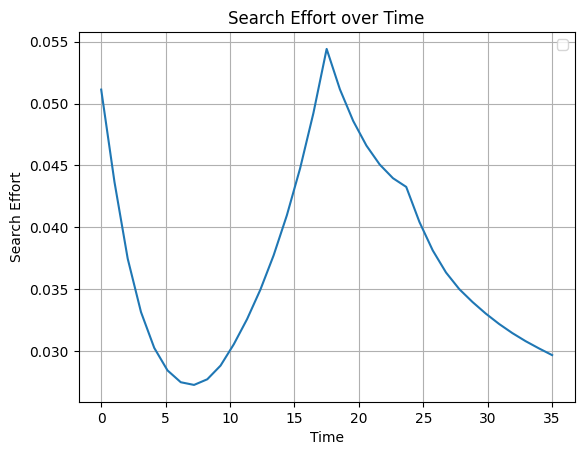

In [172]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [173]:
model.par.b1 = 342.0/675.0
model.par.b2 = 171.0/675.0

model.allocate()
s_forecast = model.solve()



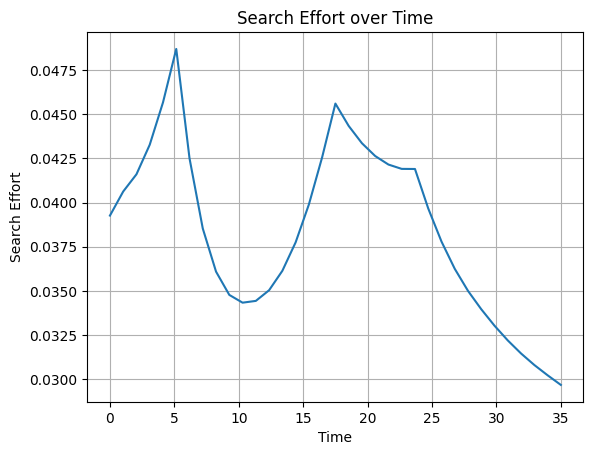

In [174]:
# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [175]:
true_data = model.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse_eta1 = np.mean((true_data - s_forecast)**2)
print(mse_eta1)

(35, 1)
(35,)
8.839643192922463e-05


# No reference dependence

In [176]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)

In [178]:

model_new.par.eta = 0.0

# model_new = model.copy()
# model_new.par.eta = 0.0

# est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
# theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
# bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est_par = ['gamma', 'cost1', 'cost2', 'cost3', 'welfare', 'type_shares1', 'type_shares3'] # Parameters to estimate
theta0 = [0.9, 80, 240, 300, 0.1, 0.5, 0.5] # Initial guesses
bounds = [(0, 50.0), (0.0, 500.0), (0.0,500,0), (0.0,500,0), (0.0,114/675), (0.0,1.0), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds,weight=False)

/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  #inv_c_marg[2] = (s/par.cost3)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  return inv_c_marg
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:45: RuntimeWarning: divide by zero encountered in scalar divide
/Users/sophiebune/Desktop/Dynamic-programming-project/hand_to_mouth.py:66: RuntimeWarning: invalid value encountered in scalar multiply
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])


In [179]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0008
Parameters:              0.006, 209.481, 362.385, 169.028, 0.003, 0.663, 0.105
Number of iterations:    510


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


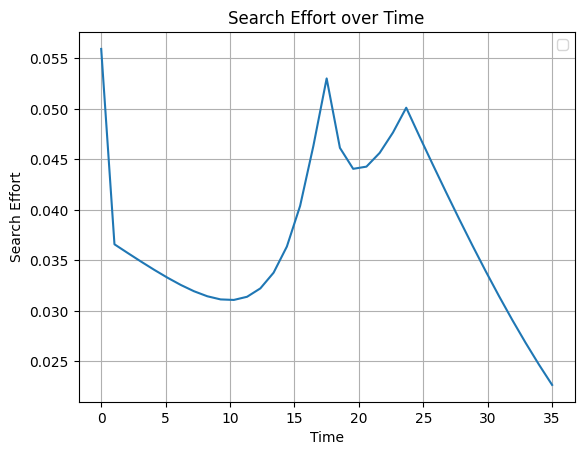

In [180]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [181]:
model_new.par.b1 = 342.0/675.0
model_new.par.b2 = 171.0/675.0

model_new.allocate()
s_forecast_new = model_new.solve()



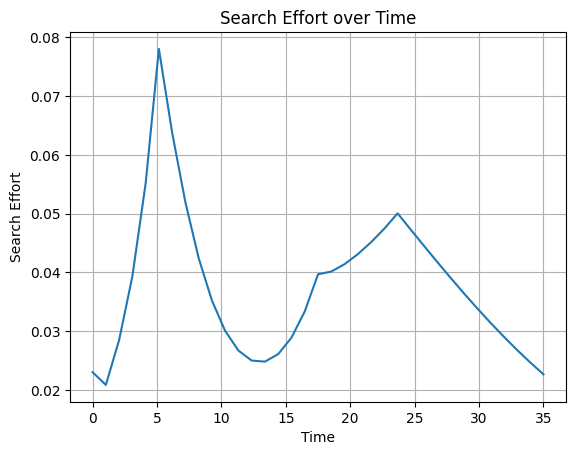

In [182]:
# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [183]:
true_data = model_new.data.moments_after
before = model_new.data.moments_before
# print(np.shape(true_data))
# print(np.shape(s_forecast_new))
# Get the mean square errors
mse_eta0 = np.mean((true_data - s_forecast_new)**2)
print(f"Mean-squared error (eta = 0, out-of-sample):        {mse_eta1:.6f}")
print(f"Mean-squared error (eta = 1, out-of-sample):        {mse_eta0:.6f}")

if mse_eta0 < mse_eta1:
    print("The model with eta = 0 is better (out-of-sample)")
else:
    print("The model with eta = 1 is better (out-of-sample)")

mse_eta0_in = np.mean((before - sim_new)**2)
mse_eta1_in = np.mean((before - sim)**2)
print(f"Mean-squared error (eta = 0, in-sample):            {mse_eta1_in:.6f}")
print(f"Mean-squared error (eta = 1, in-sample):            {mse_eta0_in:.6f}")

if mse_eta0_in < mse_eta1_in:
    print("The model with eta = 0 is better (in-sample)")
else:
    print("The model with eta = 1 is better (in-sample)")

Mean-squared error (eta = 0, out-of-sample):        0.000088
Mean-squared error (eta = 1, out-of-sample):        0.000216
The model with eta = 1 is better (out-of-sample)
Mean-squared error (eta = 0, in-sample):            0.000156
Mean-squared error (eta = 1, in-sample):            0.000159
The model with eta = 1 is better (in-sample)


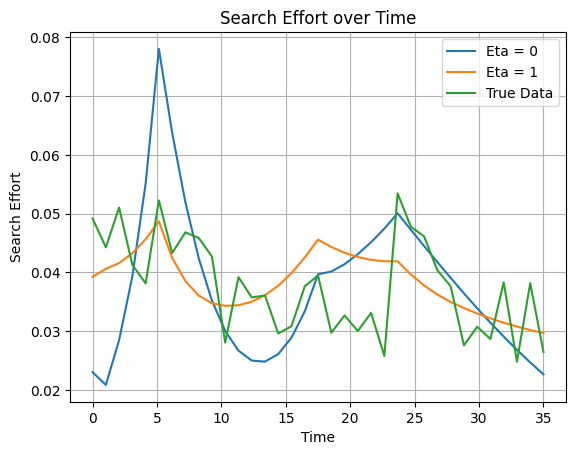

In [184]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, label='Eta = 0')
plt.plot(time, s_forecast, label='Eta = 1')
plt.plot(time, true_data, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

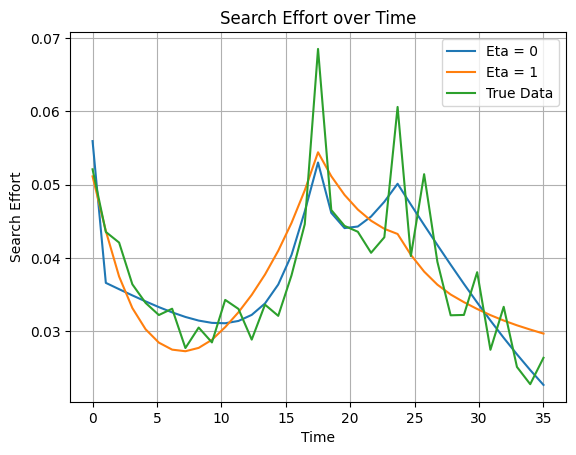

In [185]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, label='Eta = 0')
plt.plot(time, sim, label='Eta = 1') 
plt.plot(time, before, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()